In [1]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import glob

import warnings
warnings.filterwarnings("ignore")



/Users/linzipeng/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Data Perparation

## S&P

In [2]:
path = '/Users/linzipeng/Documents/IUE/2_Mineral_mining/data/SP/cleaned_data/'
files = ['SPGlobal_capital_cost.xlsx','SPGlobal_grade_and_contained.xlsx',
'SPGlobal_claim.xlsx','SPGlobal_loc_risk.xlsx','SPGlobal_operator_1.xlsx',
'SPGlobal_coal_details.xlsx','SPGlobal_operator_2.xlsx','SPGlobal_ore_capacity_1.xlsx',
'SPGlobal_comment.xlsx','SPGlobal_ore_capacity_2.xlsx',
'SPGlobal_commodity_capacity_1.xlsx','SPGlobal_ore_production_and_costs.xlsx',
'SPGlobal_commodity_capacity_2.xlsx','SPGlobal_ownership_info.xlsx',
'SPGlobal_production_rank.xlsx',
'SPGlobal_contractor.xlsx','SPGlobal_royalty_detail.xlsx',
'SPGlobal_cur_ownership_detail.xlsx','SPGlobal_technology_geology.xlsx',
'SPGlobal_drill_hole.xlsx','SPGlobal_tonnage_and_volume.xlsx',
'SPGlobal_drill_interval_grade.xlsx','SPGlobal_transaction_details_1.xlsx',
'SPGlobal_transaction_details_2.xlsx']
files = [path+i for i in files]

print('------------'*5, '\n Loading data')
main = pd.read_excel(path+'SPGlobal_general_info.xlsx')
for f in files:
    temp = pd.read_excel(f)
    main = pd.merge(main, temp, how='left')


------------------------------------------------------------ 
 Loading data


In [3]:
main = main.drop(['actv_status', 'also_known_as', 'country_name', 'dev_stage', 'prop_name', 'yr_source_date'], axis=1)


## manuall_imputed

In [4]:
nickel_mine_ma_proccessed = pd.read_excel('nickel_mine_ma_imputed.xlsx')


## Heijlen

In [5]:
df2 = pd.read_excel("/Users/linzipeng/Desktop/ScienceDirect_files_26Apr2022_08-37-31.905/1-s2.0-S0301420721002166-mmc2.xlsx",
                    skiprows=2)


In [6]:
df2.head()


Name  Region   Country  \
0          Hunters Road  Africa  Zimbabwe   
1              Shangani  Africa  Zimbabwe   
2                Trojan  Africa  Zimbabwe   
3                  Unki  Africa  Zimbabwe   
4  Trident - Enterprise  Africa    Zambia   

                                         DepositType    MajorComm  \
0                    Magmatic Ni-Cu(-Co-PGE) sulfide           Ni   
1                    Magmatic Ni-Cu(-Co-PGE) sulfide           Ni   
2                    Magmatic Ni-Cu(-Co-PGE) sulfide           Ni   
3                    Magmatic Ni-Cu(-Co-PGE) sulfide  PGE, Au, Ni   
4  Black-Shale-Hosted Ni-Cu-Zn-Co; Ga in Clastic-...           Ni   

            ByProduct         DepositStatus ProcessType  \
0                 NaN           Exploration         NaN   
1                 NaN  Care and maintenance          MC   
2                 NaN             Operating          MC   
3                  Cu             Operating       MCSRL   
4  Cu?, Zn?, Co?, Ga?           Development          MC   

                   MineType                      Owner_2019  Longitude  \
0                       NaN       Bindura Nickel Corp (BNC)     29.835   
1                       NaN       Bindura Nickel Corp (BNC)     29.230   
2  Open Pit and Underground       Bindura Nickel Corp (BNC)     31.283   
3               Underground  Anglo American Platinum (100%)     30.095   
4                  Open Pit      First Quantum Minerals Ltd     25.218   

   Latitude                                           Comments  ResourceOre  \
0   -19.164                                                NaN   36440000.0   
1   -19.687                              placed on C&M in 2007   12030000.0   
2   -17.333  Bindura Nickel Corporation (BNC) was owned by ...    6446000.0   
3   -19.623                                                NaN  223900000.0   
4   -12.174                       project is currently on hold   47000000.0   

   Resource_Ni_grade  Resource_Ni_metal  Resource_Co_grade  Resource_Co_metal  \
0               0.55           200000.0                NaN                NaN   
1               0.56            68000.0                NaN                NaN   
2               1.63           105200.0                NaN                NaN   
3               0.22           492580.0                NaN                NaN   
4               0.97           454340.0                NaN                NaN   

   Resource_Cu_grade  Resource_Cu_metal  ReserveOre  Reserve_Ni_grade  \
0                NaN                NaN         NaN               NaN   
1                NaN                NaN         NaN               NaN   
2                NaN                NaN   2450000.0              0.94   
3               0.14           313460.0  53500000.0              0.22   
4                NaN                NaN  34700000.0              0.99   

   Reserve_Ni_metal  Reserve_Co_grade  Reserve_Co_metal  Reserve_Cu_grade  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2           23100.0               NaN               NaN               NaN   
3          117700.0               NaN               NaN              0.14   
4          343530.0               NaN               NaN               NaN   

   Reserve_Cu_metal  ResourceYear            ResourceType  \
0               NaN        2019.0         CODED-JORC 2012   
1               NaN        2019.0         CODED-JORC 2012   
2               NaN        2019.0         CODED-JORC 2012   
3           74900.0        2019.0  non-compliant estimate   
4               NaN        2019.0         CODED-JORC 2012   

                     ResourceReference  \
0                      BNC AnnRpt 2019   
1                      BNC AnnRpt 2019   
2                      BNC AnnRpt 2019   
3  Anglo American Platinum AnnRpt 2019   
4                  FQM AnnInfForm 2019   

                                    ResourceComme

# Data Processing

## grade

In [7]:
nickel_mine_ma_proccessed.groupby('country_name')['grade (%)'].agg([np.mean, np.median])


mean   median
country_name                         
Albania             1.200000  1.20000
Argentina                NaN      NaN
Australia           1.457819  0.99000
Austria                  NaN      NaN
Botswana            0.369000  0.32500
Brazil              1.154375  1.29500
Burkina Faso             NaN      NaN
Burundi                  NaN      NaN
Cameroon            0.660000  0.66000
Canada              1.033200  0.73125
China               0.827037  0.65500
Colombia            1.200000  1.20000
Cote d'Ivoire       1.116500  1.11650
Cuba                1.025000  1.15000
Dem. Rep. Congo          NaN      NaN
Dominican Republic  1.405000  1.40500
Ethiopia                 NaN      NaN
Finland             0.415125  0.24000
France                   NaN      NaN
Gabon                    NaN      NaN
Germany                  NaN      NaN
Greece              0.810000  0.81000
Greenland                NaN      NaN
Guatemala           1.740000  1.86000
Guinea                   NaN      NaN
Guyana                   NaN      NaN
India                    NaN      NaN
Indonesia           1.680350  1.73000
Italy                    NaN      NaN
Japan                    NaN      NaN
Kazakhstan          0.790000  0.79000
Laos                     NaN      NaN
Madagascar          1.270000  1.27000
Malaysia            0.750000  0.75000
Mauritania               NaN      NaN
Mexico                   NaN      NaN
Mozambique               NaN      NaN
Myanmar             1.455000  1.45500
New Caledonia       1.931667  2.14500
New Zealand              NaN      NaN
North Korea              NaN      NaN
North Macedonia          NaN      NaN
Norway              0.520000  0.44500
Papua New Guinea    0.966667  0.94000
Paraguay                 NaN      NaN
Peru                     NaN      NaN
Philippines         1.364400  1.32000
Poland                   NaN      NaN
Portugal                 NaN      NaN
Russia              0.728812  0.73500
Saudi Arabia             NaN      NaN
Serbia              1.100000  1.10000
Sierra Leone             NaN      NaN
Slovakia                 NaN      NaN
Solomon Islands     1.550000  1.55000
South Africa        0.296000  0.27500
South Korea              NaN      NaN
Spain               0.600000  0.60000
Sweden              1.221333  1.25000
Taiwan, China            NaN      NaN
Tanzania            1.222500  0.81500
Togo                0.990000  0.99000
Tonga               1.300000  1.30000
Turkey              0.915000  0.91500
USA                 0.630375  0.17500
Uganda                   NaN      NaN
Ukraine                  NaN      NaN
United Kingdom           NaN      NaN
Venezuela           1.480000  1.48000
Vietnam             2.200000  2.20000
Yemen                    NaN      NaN
Zambia              0.995000  0.99500
Zimbabwe            0.465714  0.54000

<AxesSubplot:>

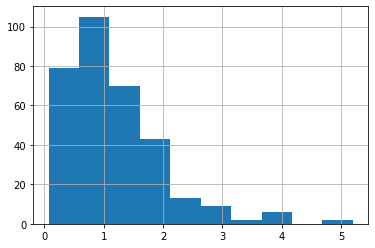

In [8]:
nickel_mine_ma_proccessed['grade (%)'].hist()


In [9]:
grade_dic = nickel_mine_ma_proccessed.groupby('country_name')['grade (%)'].median().dropna().to_dict()


In [10]:
world_median = nickel_mine_ma_proccessed['grade (%)'].median()
for i in set(nickel_mine_ma_proccessed.country_name) - set(grade_dic.keys()):
    grade_dic.update({i:world_median})

    

In [11]:
grade_dic


{'Albania': 1.2,
 'Australia': 0.99,
 'Botswana': 0.325,
 'Brazil': 1.295,
 'Cameroon': 0.66,
 'Canada': 0.73125,
 'China': 0.655,
 'Colombia': 1.2,
 "Cote d'Ivoire": 1.1165,
 'Cuba': 1.15,
 'Dominican Republic': 1.405,
 'Finland': 0.24,
 'Greece': 0.81,
 'Guatemala': 1.86,
 'Indonesia': 1.73,
 'Kazakhstan': 0.79,
 'Madagascar': 1.27,
 'Malaysia': 0.75,
 'Myanmar': 1.455,
 'New Caledonia': 2.145,
 'Norway': 0.445,
 'Papua New Guinea': 0.94,
 'Philippines': 1.32,
 'Russia': 0.735,
 'Serbia': 1.1,
 'Solomon Islands': 1.55,
 'South Africa': 0.275,
 'Spain': 0.6,
 'Sweden': 1.25,
 'Tanzania': 0.815,
 'Togo': 0.99,
 'Tonga': 1.3,
 'Turkey': 0.9149999999999999,
 'USA': 0.175,
 'Venezuela': 1.48,
 'Vietnam': 2.2,
 'Zambia': 0.995,
 'Zimbabwe': 0.54,
 'France': 0.96,
 'Portugal': 0.96,
 'United Kingdom': 0.96,
 'Uganda': 0.96,
 'Burkina Faso': 0.96,
 'Paraguay': 0.96,
 'Italy': 0.96,
 'North Macedonia': 0.96,
 'Japan': 0.96,
 'Ukraine': 0.96,
 'South Korea': 0.96,
 'Mexico': 0.96,
 'Slovakia':

In [12]:
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['grade (%)'].isnull(), 'grade (%)'] =\
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['grade (%)'].isnull(), 'country_name'].replace(grade_dic)


## reserve

In [13]:
nickel_mine_ma_proccessed['production_resv_ratio'] = nickel_mine_ma_proccessed['production (mt)'] / nickel_mine_ma_proccessed['resv_metal_tonnage (mt)']


In [14]:
p_r_ratio_dic = nickel_mine_ma_proccessed.groupby('country_name')['production_resv_ratio'].median().dropna().to_dict()



In [15]:
world_median = nickel_mine_ma_proccessed['production_resv_ratio'].median()
for i in set(nickel_mine_ma_proccessed.country_name) - set(p_r_ratio_dic.keys()):
    p_r_ratio_dic.update({i:world_median})
    

In [16]:
p_r_ratio_dic


{'Australia': 0.09160756501182032,
 'Botswana': 0.14333255809446285,
 'Brazil': 0.030099062322720638,
 'Cameroon': 0.0912422637884142,
 'Canada': 0.09454608297369599,
 'China': 0.048824593128390596,
 'Colombia': 0.09234234234234234,
 "Cote d'Ivoire": 2.132196162046908e-06,
 'Cuba': 0.05498045511657128,
 'Dominican Republic': 0.03783986619778712,
 'Finland': 0.17134578892922572,
 'Guatemala': 0.06093189964157706,
 'Indonesia': 0.04231737391304347,
 'Kazakhstan': 0.021373532624779413,
 'Madagascar': 0.03578832116788321,
 'Myanmar': 0.024285714285714285,
 'New Caledonia': 0.013601586851799376,
 'Papua New Guinea': 0.07479761904761904,
 'Philippines': 0.08192307692307692,
 'Russia': 0.18779658352546635,
 'South Africa': 0.25204050051949717,
 'USA': 0.09666739823599545,
 'Venezuela': 0.15254237288135594,
 'Vietnam': 0.5009968335874282,
 'Zambia': 0.11360612619929752,
 'Zimbabwe': 0.03911639762107052,
 'France': 0.06021374164163161,
 'Portugal': 0.06021374164163161,
 'United Kingdom': 0.0602

In [17]:
impute_index = nickel_mine_ma_proccessed['resv_metal_tonnage (mt)'].isnull() & nickel_mine_ma_proccessed['resv_ore_tonnage (mt)'].notnull()
nickel_mine_ma_proccessed.loc[impute_index, 'resv_metal_tonnage (mt)'] = nickel_mine_ma_proccessed.loc[impute_index, 'resv_ore_tonnage (mt)'] * nickel_mine_ma_proccessed.loc[impute_index, 'grade (%)'] / 100 


In [18]:
impute_index = (nickel_mine_ma_proccessed['resv_metal_tonnage (mt)'].isnull()) & (nickel_mine_ma_proccessed['production (mt)'].notnull())
nickel_mine_ma_proccessed.loc[impute_index, 'production_resv_ratio'] = nickel_mine_ma_proccessed.loc[impute_index, 'country_name'].replace(p_r_ratio_dic)
nickel_mine_ma_proccessed.loc[impute_index, 'resv_metal_tonnage (mt)'] = nickel_mine_ma_proccessed.loc[impute_index, 'production (mt)'] / nickel_mine_ma_proccessed.loc[impute_index, 'production_resv_ratio']


In [19]:
impute_index = nickel_mine_ma_proccessed['resv_ore_tonnage (mt)'].isnull()
nickel_mine_ma_proccessed.loc[impute_index, 'resv_ore_tonnage (mt)'] = nickel_mine_ma_proccessed.loc[impute_index, 'resv_metal_tonnage (mt)'] / nickel_mine_ma_proccessed.loc[impute_index, 'grade (%)'] * 100  


## check world reserve

In [20]:
stat = nickel_mine_ma_proccessed.groupby('country_name')['resv_metal_tonnage (mt)', 'production (mt)'].sum().astype(int)


In [21]:
# usgs_stat
usgs_stat = pd.read_excel('USGS_nickel_by_country.xlsx', index_col='Unnamed: 0')
usgs_stat['Reserves_ratio'] = usgs_stat['Reserves'] / 94000000
usgs_stat


Production_2019  Production_2020e  Production_2019_ratio  \
USA                           13500             16000               0.005172   
Australia                    159000            170000               0.060920   
Brazil                        60600             73000               0.023218   
Canada                       181000            150000               0.069349   
China                        120000            120000               0.045977   
Cuba                          49200             49000               0.018851   
Dominican Republic            56900             47000               0.021801   
Indonesia                    853000            760000               0.326820   
New Caledonia                208000            200000               0.079693   
Philippines                  323000            320000               0.123755   
Russia                       279000            280000               0.106897   
Others                       310000            290000               0.118774   
World                       2610000           2500000               1.000000   

                    Production_2020e_ratio  Reserves  Reserves_ratio  
USA                                 0.0064    100000        0.001064  
Australia                           0.0680  20000000        0.212766  
Brazil                              0.0292  16000000        0.170213  
Canada                              0.0600   2800000        0.029787  
China                               0.0480   2800000        0.029787  
Cuba                                0.0196   5500000        0.058511  
Dominican Republic                  0.0188    930000        0.009894  
Indonesia                           0.3040  21000000        0.223404  
New Caledonia                       0.0800  12000000        0.127660  
Philippines                         0.1280   4800000        0.051064  
Russia                              0.1120   6900000        0.073404  
Others                              0.1160  14000000        0.148936  
World                               1.0000  94000000        1.000000

In [22]:
stat = pd.concat([stat, usgs_stat], axis=1).dropna()


In [23]:
stat['resv_metal_tonnage (mt)'] / stat['Reserves']


Australia             0.813047
Brazil                0.626651
Canada                2.270675
China                 1.521825
Cuba                  0.987855
Dominican Republic    1.102280
Indonesia             1.287679
New Caledonia         1.211584
Philippines           1.302665
Russia                1.027908
USA                   4.094450
dtype: float64

In [24]:
(stat['production (mt)'] / stat['Production_2020e']).dropna()


Australia             2.491594
Brazil                1.600808
Canada                2.492793
China                 1.165100
Cuba                  1.159306
Dominican Republic    0.750936
Indonesia             0.722501
New Caledonia         1.027110
Philippines           1.141972
Russia                1.022607
USA                   1.626187
dtype: float64

In [25]:
stat['resv_metal_tonnage (mt)'].sum() / 94000000
stat['resv_metal_tonnage (mt)'].sum()
# 储量多了


1.0499975212765957

98699767.0

In [26]:
stat['production (mt)'].sum()
stat['production (mt)'].sum() / 2600000


2578564.0

0.9917553846153846

## other

In [27]:
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['production (mt)'].notnull(), 'dev_stage'] = 'Operating'
nickel_mine_ma_proccessed.loc[nickel_mine_ma_proccessed['production (mt)'].notnull(), 'actv_status'] = 'Active'


# merge

In [28]:
# nickel_mine_ma_proccessed.to_excel('nickel_mine_final.xlsx', index=None)


In [29]:
nickel_mine_ma_proccessed = pd.read_excel('nickel_mine_final.xlsx')


In [30]:
main = main[main['primary_commodity']=='Nickel']
df = pd.merge(main, nickel_mine_ma_proccessed, how='outer')
df.shape


(1447, 238)

# Data exploration

## 镍矿的地域分布

以下以镍矿为例，来介绍标普矿点数据包含的信息维度

## 镍矿的地域分布

以下以镍矿为例，来介绍标普矿点数据包含的信息维度

In [31]:
import plotly.express as px
import plotly.graph_objs as go


In [32]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(df.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        radius = 3, 
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" ,},
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [33]:
df.head()


prop_id  prop_id.1              prop_name.1 primary_commodity  \
0  87482.0    87482.0                113 North            Nickel   
1  29336.0    29336.0                   1514-M            Nickel   
2  86297.0    86297.0               8 Mile Dam            Nickel   
3  31679.0    31679.0                    Acoje            Nickel   
4  37537.0    37537.0  Adlay-Cagdianao-Tandawa            Nickel   

   mo_source_date mo_yr_source_date mine_type1   mine_type2 mine_type3  \
0             6.0           06/2021        NaN          NaN        NaN   
1             9.0           09/1995   Open Pit          NaN        NaN   
2             7.0           07/2021        NaN          NaN        NaN   
3             3.0           03/2019   Open Pit  Underground        NaN   
4             4.0           04/2010   Open Pit          NaN        NaN   

                                    commodities_list  amt_capital_invested  \
0     Nickel,Copper,Gold,Platinum,Palladium,Iron Ore                   NaN   
1                               Nickel,Copper,Cobalt                   NaN   
2                                      Nickel,Copper                   NaN   
3  Nickel,Cobalt,Palladium,Platinum,Chromite,Chro...              498000.0   
4                                             Nickel                   NaN   

  capital_cost_announced_date capital_cost_proj_completion_date  \
0                         NaT                               NaT   
1                         NaT                               NaT   
2                         NaT                               NaT   
3                  2008-11-27                               NaT   
4                         NaT                               NaT   

  capital_cost_completion_date     capital_cost_type capital_cost_comments  \
0                          NaT                   NaN                   NaN   
1                          NaT                   NaN                   NaN   
2                          NaT                   NaN                   NaN   
3                          NaT  Initial Capital Cost                   NaN   
4                          NaT                   NaN                   NaN   

   capital_improvement_yr  grd_resv_g_per_tonne  \
0                     NaN                   NaN   
1                     NaN                   NaN   
2                     NaN                   NaN   
3                  2008.0                   NaN   
4                     NaN                   NaN   

   contained_resv_oz_g_per_tonne  grd_meas_ind_g_per_tonne  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   

   contained_meas_ind_oz_g_per_tonne  grd_inf_g_per_tonne  \
0                                NaN                  NaN   
1                                NaN                  NaN   
2                                NaN                  NaN   
3                                NaN                  NaN   
4                                NaN                  NaN   

   contained_inf_oz_g_per_tonne  grd_total_resrc_g_per_tonne  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   contained_total_resrc_oz_g_per_tonne  grd_r_and_r_g_per_tonne  \
0                                   NaN                      NaN   
1                                   NaN                      NaN   
2                                   NaN                      NaN   
3                                   NaN                      NaN   
4                                   

In [34]:
labels = df['country_name'].value_counts().index.tolist()[:9]
df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'


## 矿点活跃状态

当前矿点活跃状态的分布

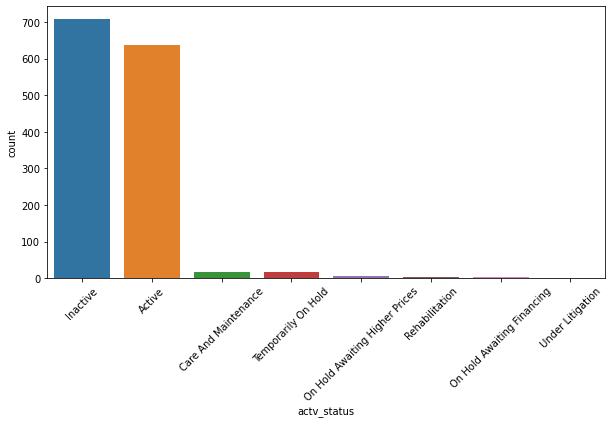

In [35]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="actv_status", data=df, order=df['actv_status'].value_counts().index)
t = plt.xticks(rotation=45)


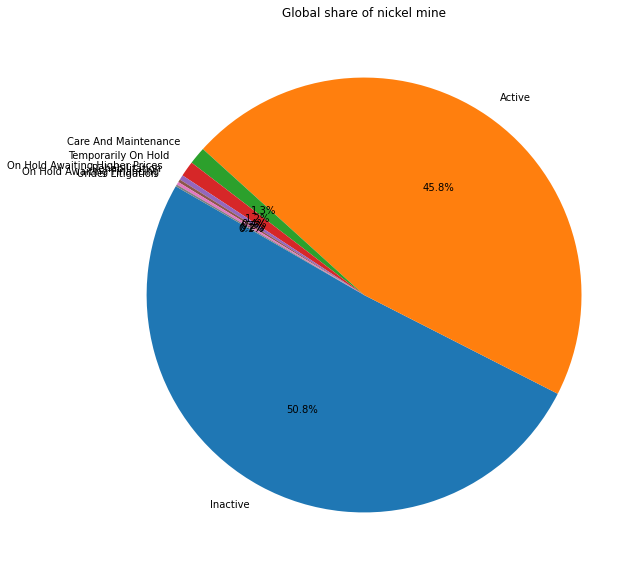

In [36]:
labels = df['actv_status'].value_counts().index.tolist()
sizes = df['actv_status'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


各阶段矿点的全球分布情况

In [37]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'The Distribution of Nickel Mines',
                        color = 'actv_status',
                        zoom = 1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        height=600,
                        width=1300,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [38]:
tmp = df.groupby(['country_name_new']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


In [39]:
df = df.rename(columns={'snl_global_region':'global_region'})

In [40]:
tmp = df.groupby(['global_region']).apply(lambda x: x['actv_status'].value_counts(normalize=True)).unstack().fillna(0).T
tmp = np.round(tmp*100, 2)
tmp.style.background_gradient()


### 活跃镍矿点的地域分布

In [41]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(df.dropna(subset=['actv_status']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


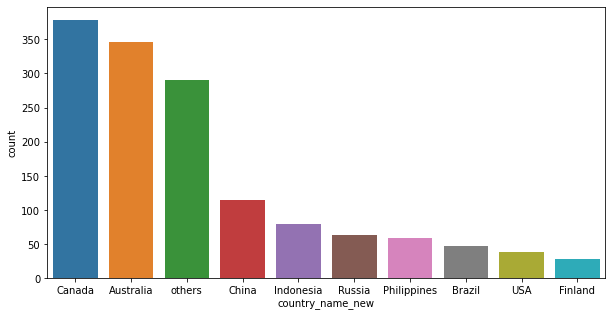

In [42]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="country_name_new", data=df, order=df['country_name_new'].value_counts().index)


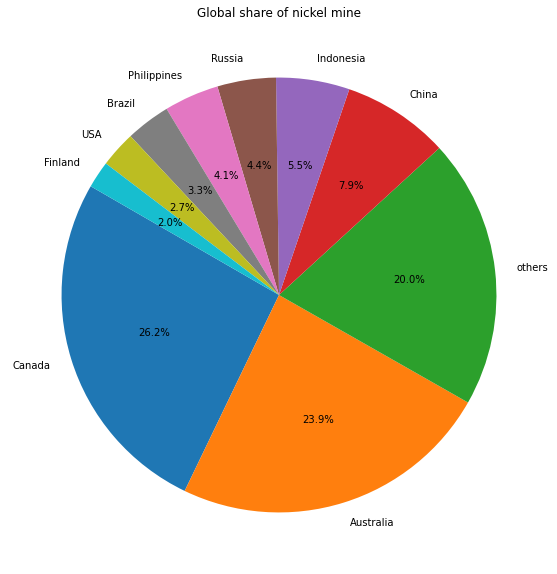

In [43]:
labels = df['country_name_new'].value_counts().index.tolist()
sizes = df['country_name_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


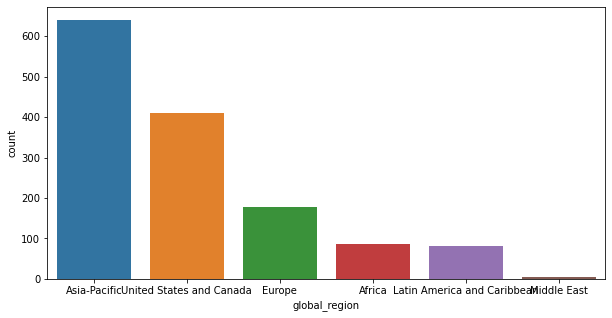

In [44]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="global_region", data=df, order=df['global_region'].value_counts().index)


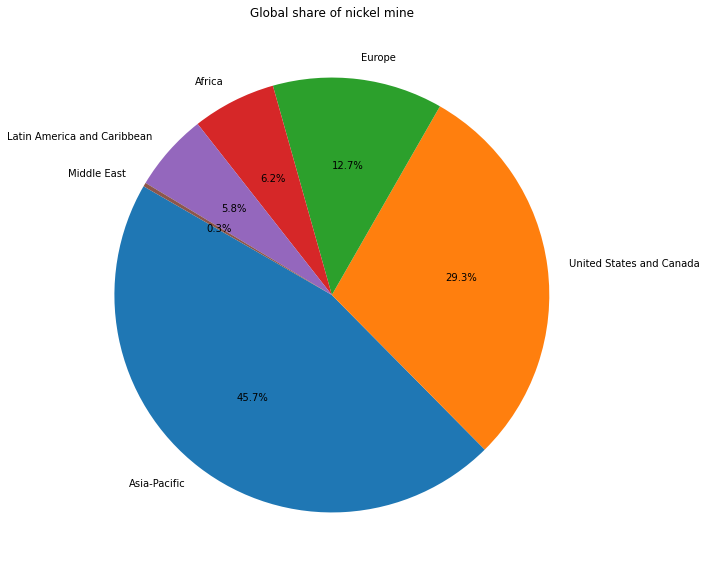

In [45]:
labels = df['global_region'].value_counts().index.tolist()
sizes = df['global_region'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


以下限定为活跃状态的矿点

In [46]:
# df = df[df['actv_status']=='Active']

## 矿点类型

In [47]:
print('空值率:', np.round(df['mine_type1'].isnull().mean(), 4))

空值率: 0.7001


In [125]:
df['geologic_ore_body_type'].value_counts()

Laterite (Generic)                                                                                              126
Layered Mafic-Ultramafic Intrusion                                                                               35
Komatiitic Magmatic                                                                                              33
Laterite (Ni-Co - Limonite), Laterite (Ni-Saprolite)                                                             12
Laterite (Generic), Laterite (Ni-Saprolite)                                                                      10
Volcanogenic Massive Sulfide (VMS)                                                                                7
Laterite (Ni-Co - Limonite)                                                                                       7
Flood Basalt (Dyke-Sill Complexes)                                                                                6
Laterite (Ni-Saprolite)                                                 

In [132]:
df['is_laterite'] = df['geologic_ore_body_type'].str.contains('Laterite').astype(float)
df['is_sulfide'] = df['geologic_ore_body_type'].str.contains('Mafic-Ultramafic').astype(float)
df['ore_body_type'] = df.apply(lambda x: 'Laterite and Saprolite' if (x['is_laterite']==1) & (x['is_sulfide']==1)
                               else 'Laterite' if (x['is_laterite']==1)
                               else 'Sulfide' if (x['is_sulfide']==1)
                               else 'Other' if pd.notna(x['geologic_ore_body_type'])
                               else np.nan, axis=1)
df['ore_body_type'].value_counts()


Laterite                  163
Other                      75
Sulfide                    43
Laterite and Saprolite      3
Name: ore_body_type, dtype: int64

In [139]:
# token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['ore_body_type']).head(30),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'ore_body_type',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [48]:
labels = df['mine_type1'].value_counts().index.tolist()
df.loc[:, 'mine_type1_new'] = df.loc[:, 'mine_type1']
df.loc[~df['mine_type1'].isin(labels), 'mine_type1_new'] = 'others'


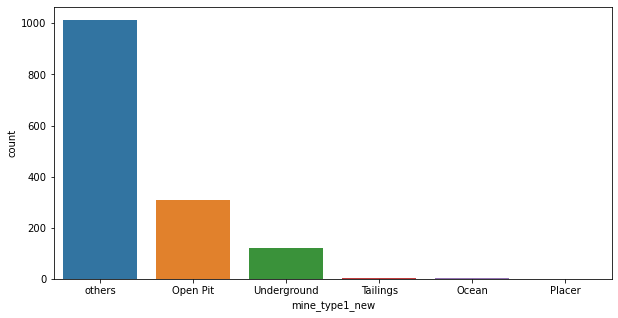

In [49]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="mine_type1_new", data=df, order=df['mine_type1_new'].value_counts().index)


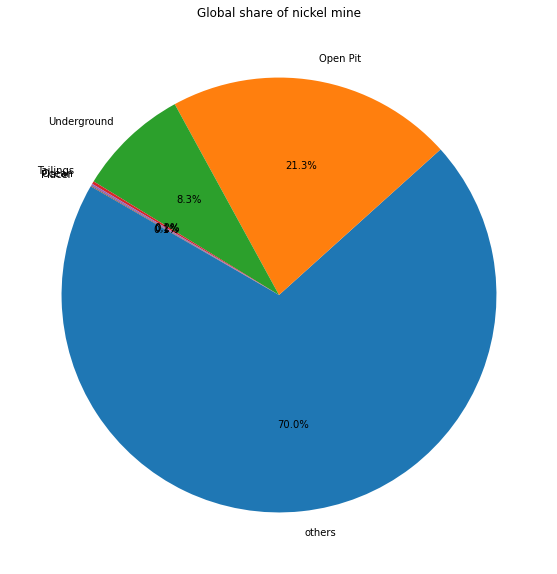

In [50]:
labels = df['mine_type1_new'].value_counts().index.tolist()
sizes = df['mine_type1_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [51]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.density_mapbox(df,
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        radius = 10,
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [52]:
# token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [53]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['mine_type1']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mdistribution',
                        color = 'mine_type1',
                        zoom = 2,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 发展阶段

In [54]:
labels = df['dev_stage'].value_counts().index.tolist()[:9]
df.loc[:, 'dev_stage_new'] = df.loc[:, 'dev_stage']
df.loc[~df['dev_stage'].isin(labels), 'dev_stage_new'] = 'others'


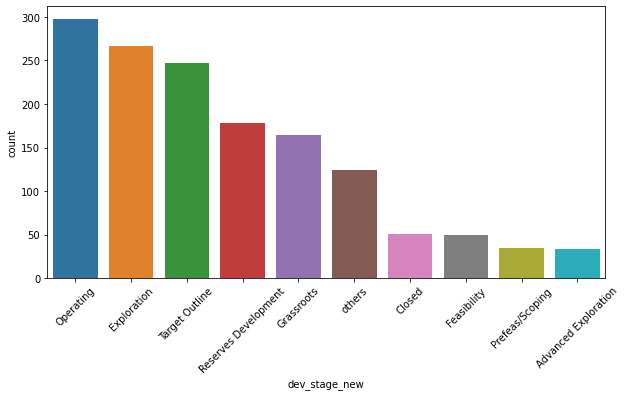

In [55]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="dev_stage_new", data=df, order=df['dev_stage_new'].value_counts().index)
t = plt.xticks(rotation=45)

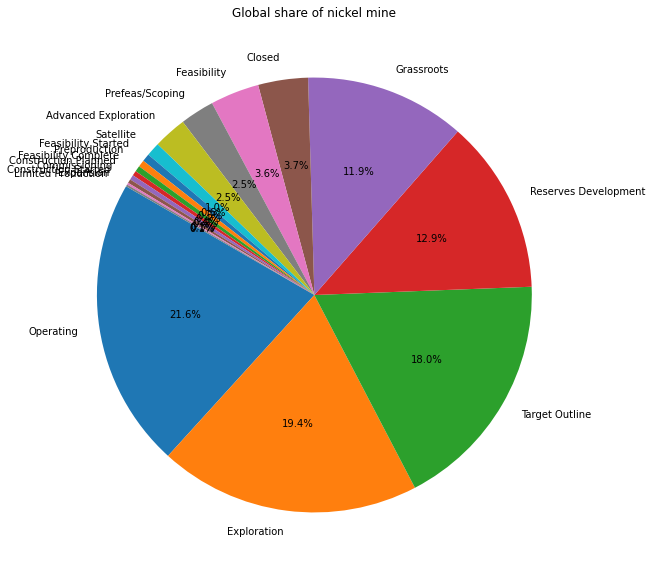

In [56]:
labels = df['dev_stage'].value_counts().index.tolist()
sizes = df['dev_stage'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [57]:
stage_dic = {'Grassroots':'Early-stage exploration',
'Exploration':'Early-stage exploration',
'Target Outline':'Early-stage exploration',

'Advanced Exploration':'Late-stage exploration',
'Prefeas/Scoping':'Late-stage exploration',
 
'Feasibility Started':'Feasibility-stage',
'Feasibility':'Feasibility-stage',
 
'Feasibility Complete':'Development-stage',
'Reserves Development':'Development-stage',

'Satellite':'Construction-stage',
'Construction Planned':'Construction-stage',
'Construction Started':'Construction-stage',
 
'Commissioning':'Construction-stage',
'Preproduction':'Construction-stage',

'Operating':'Operating-stage',
 
'Limited Production':'Operating-stage',
'Expansion':'Operating-stage',
'Closed':'Closed-stage'}

df['development_stage'] = df['dev_stage'].map(stage_dic)


In [58]:
df['development_stage'].unique()

array(['Early-stage exploration', 'Operating-stage',
       'Late-stage exploration', 'Closed-stage', 'Development-stage', nan,
       'Construction-stage', 'Feasibility-stage'], dtype=object)

In [59]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreDVqbWE3ZDA1Y3oycG9nZW94aTQ1dmkifQ.-Buh8xnLlmWz_efMRk6cfw'

fig = px.scatter_mapbox(df.dropna(subset=['development_stage']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'development_stage',
                        category_orders={'Early-stage exploration':0, 'Late-stage exploration':1, 'Feasibility-stage':2,
                                         'Development-stage':3, 'Construction-stage':4, 'Operating-stage':5, 'Closed-stage':6},
                        zoom = 1,
                        height=600,
                        width=1300,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


## 信息更新时间

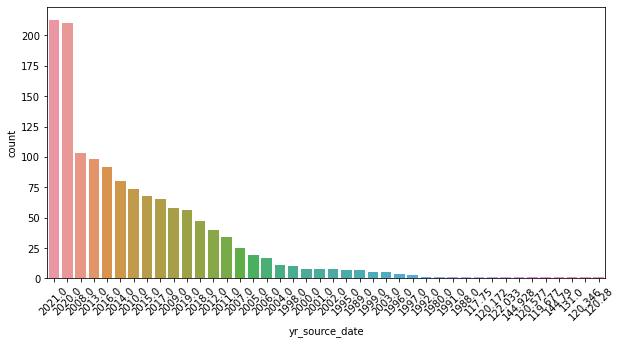

In [60]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="yr_source_date", data=df, order=df['yr_source_date'].value_counts().index)
t = plt.xticks(rotation=45)


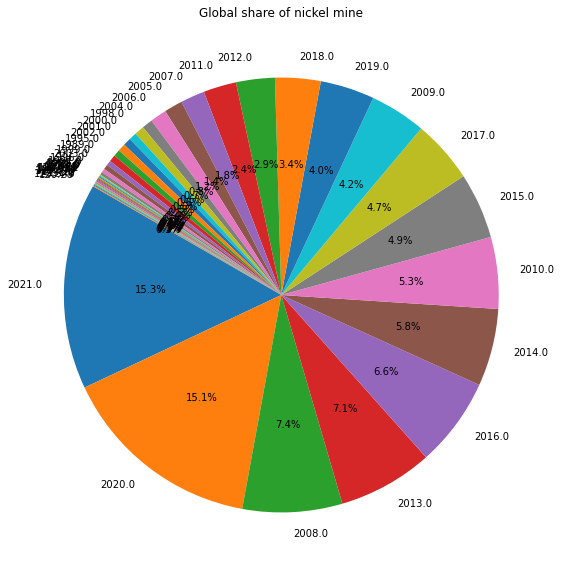

In [61]:
labels = df['yr_source_date'].value_counts().index.tolist()
sizes = df['yr_source_date'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


# 矿点所有权

In [62]:
labels = df['owner_country'].value_counts().index.tolist()[:9]
df.loc[:, 'owner_country_new'] = df.loc[:, 'owner_country']
df.loc[~df['owner_country'].isin(labels), 'owner_country_new'] = 'others'


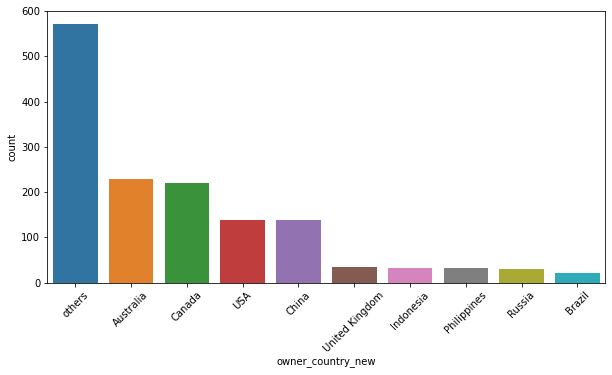

In [63]:
t = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="owner_country_new", data=df, order=df['owner_country_new'].value_counts().index)
t = plt.xticks(rotation=45)

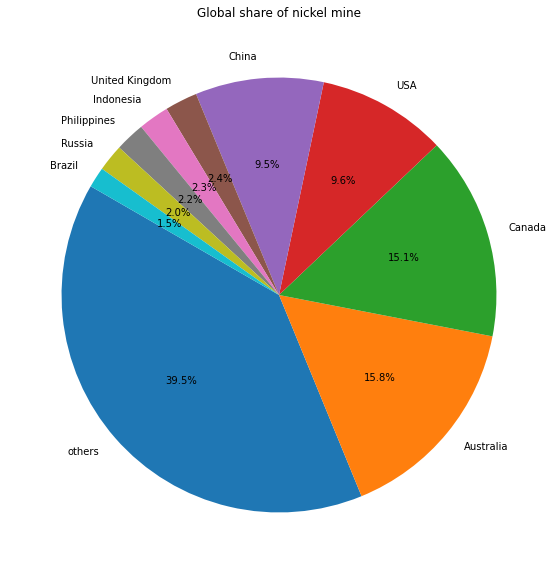

In [64]:
labels = df['owner_country_new'].value_counts().index.tolist()
sizes = df['owner_country_new'].value_counts().values
t = plt.figure(figsize=(10, 10))
t = plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
t = plt.title("Global share of nickel mine")


In [65]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['owner_pct', 'owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'owner_country_new',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        size_max = 5,
                        size = 'owner_pct',
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [91]:
labels = df.groupby('country_name')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False).head(20).index
df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

df.groupby('country_name_new')['self_country_owned'].mean().map(lambda x: '%.2f'%(100*x)+'%').to_frame()

self_country_owned
country_name_new                     
Australia                      52.31%
Brazil                         14.58%
Canada                         46.17%
China                          60.87%
Cote d'Ivoire                  33.33%
Cuba                           41.67%
Dominican Republic              0.00%
Finland                        10.34%
Guatemala                       0.00%
Indonesia                      39.24%
Kazakhstan                     14.29%
Madagascar                      0.00%
Myanmar                         0.00%
New Caledonia                  50.00%
Papua New Guinea               16.67%
Philippines                    54.24%
Russia                         41.27%
South Africa                   11.11%
Zambia                          0.00%
Zimbabwe                       50.00%
others                         16.59%

In [79]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

df['self_country_owned'] = (df['owner_country']==df['country_name']).astype(int)
fig = px.scatter_mapbox(df.dropna(subset=['owner_pct', 'owner_country_new']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'self_country_owned',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        size_max = 5,
                        size = 'owner_pct',
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


矿点所有者数量的分布


<AxesSubplot:>

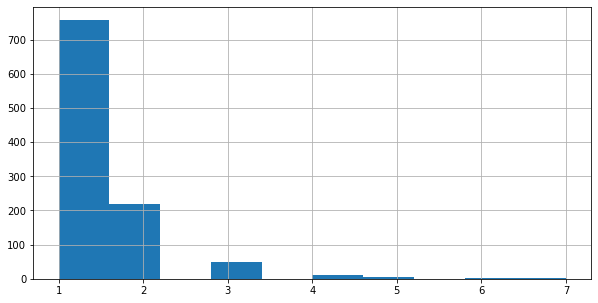

In [67]:
print('矿点所有者数量的分布')
df['num_royalty_owners'].hist(figsize=(10, 5))

In [68]:
import re
from collections import Counter
def extract(x):
    if not pd.isna(x):
        x = x.replace(',', '.')
        pct_lst = re.findall(r'\d+%', str(x))
        x = re.sub(r'[\d+%]', '', re.sub(r'\(.*?\)', '', str(x)))
        x_lst = x.split(';')
        x_lst = [i.replace('.', '').lstrip(" ").rstrip(" ") for i in x_lst]
        return x_lst#, pct_lst
    else:
        return None
    

In [69]:
df['owner_list_new'] = df['owner_list'].map(extract)
temp = []
for i in df['owner_list_new']:
    if i is not None:
        temp += i
        

In [70]:
temp = pd.Series(Counter(temp)).sort_values(ascending=False).reset_index().head(20)
temp.columns = ['company', 'count']


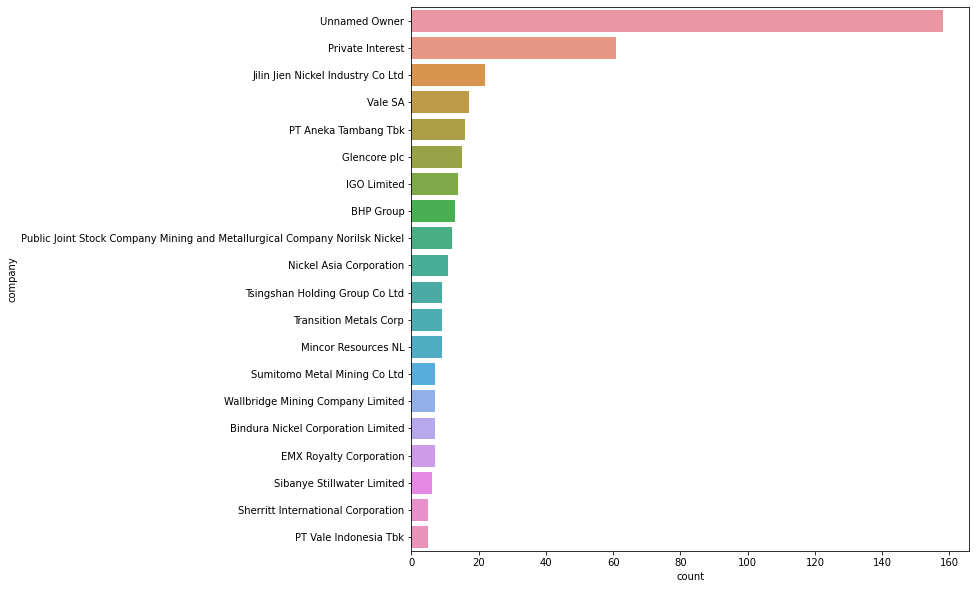

In [71]:
t = plt.figure(figsize=(10, 10))
t = sns.barplot(y='company', x='count', data=temp, orient='h')


# 资金成本

------------------------------------------------------------ 
矿点的资金投入额的分布


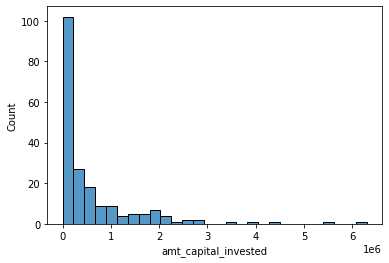

In [92]:
print('------------'*5, '\n矿点的资金投入额的分布')
t = sns.histplot(data=df, x='amt_capital_invested')

In [73]:
print('------------'*5, '\n矿点资金投入的地域分布')


------------------------------------------------------------ 
矿点资金投入的地域分布


In [93]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df[df['amt_capital_invested'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'buyer_country_new',
                        title = 'nickel mine distribution',
                        zoom = 1,
                        size = 'amt_capital_invested',
                        size_max = 30,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [75]:
print('------------'*5, '\n矿点资金投入类型的地域分布')


------------------------------------------------------------ 
矿点资金投入类型的地域分布


In [76]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df[df['capital_cost_type'].notnull()],
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'capital_cost_type',
                        title = 'nickel mine distribution',
                        zoom = 1,
#                         hover_data = ['r_and_r_ore_tonnage'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 矿石产能

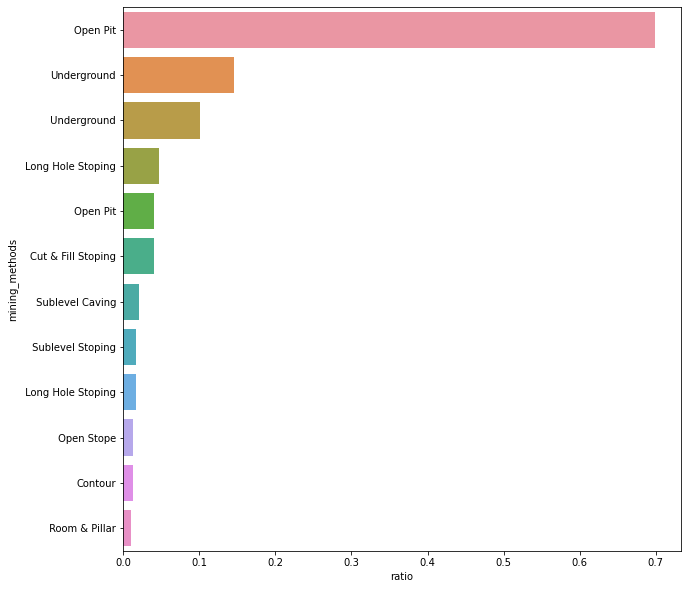

In [77]:
temp = df['mining_methods'].str.split(',', expand=True).add_prefix('mining_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / df[df['mining_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['mining_methods', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='mining_methods', x='ratio', orient='h')


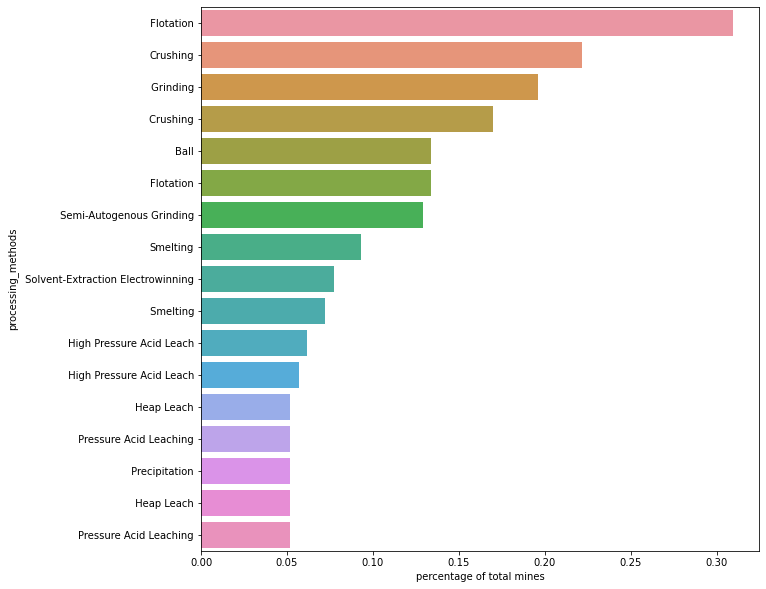

In [95]:
temp = df['processing_methods'].str.split(',', expand=True).add_prefix('processing_methods')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / df[df['processing_methods'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['processing_methods', 'percentage of total mines']
temp = temp[temp['percentage of total mines']>0.05]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='processing_methods', x='percentage of total mines', orient='h')

------------------------------------------------------------ 
矿点产出矿物形式的分布


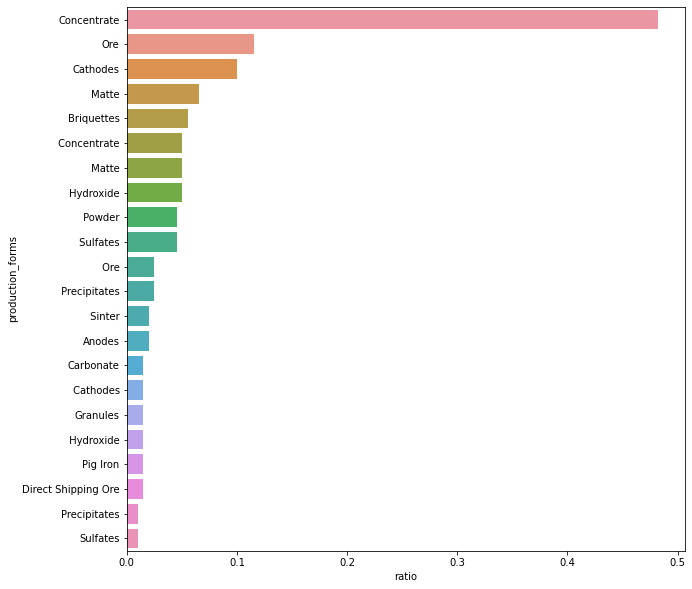

In [96]:
print('------------'*5, '\n矿点产出矿物形式的分布')

temp = df['production_forms'].str.split(',', expand=True).add_prefix('production_forms')\
                                     .apply(lambda x: x.value_counts(normalize=False))\
                                     .sum(axis=1).sort_values(ascending=False) / df[df['production_forms'].notnull()].shape[0]
temp = temp.reset_index()
temp.columns  = ['production_forms', 'ratio']
temp = temp[temp['ratio']>0.01]

t = plt.figure(figsize=(10, 10))
t = sns.barplot(data=temp, y='production_forms', x='ratio', orient='h')

In [103]:
temp = temp.groupby('production_forms')['ratio'].sum().sort_values(by=)

production_forms
 Cathodes              0.015075
 Concentrate           0.050251
 Hydroxide             0.015075
 Matte                 0.050251
 Ore                   0.025126
 Powder                0.045226
 Precipitates          0.025126
 Sinter                0.020101
 Sulfates              0.045226
Anodes                 0.020101
Briquettes             0.055276
Carbonate              0.015075
Cathodes               0.100503
Concentrate            0.482412
Direct Shipping Ore    0.015075
Granules               0.015075
Hydroxide              0.050251
Matte                  0.065327
Ore                    0.115578
Pig Iron               0.015075
Precipitates           0.010050
Sulfates               0.010050
Name: ratio, dtype: float64

In [99]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['production_forms']),
                        lon = 'longitude',
                        lat = 'latitude',
                        color = 'production_forms',
                        title = 'nickel mine distribution',
                        zoom = 2,
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

In [ ]:
print('------------'*5, '\n矿点日产能数额的分布')


In [ ]:
t = sns.histplot(df, x='mining_processing_cost_per_metric_tonne')

In [ ]:
print('------------'*5, '\n矿点日产能数额的国家分布')

temp = df.groupby('country_name')['mining_processing_cost_per_metric_tonne'].mean().dropna().sort_values().to_frame()
temp.style.background_gradient()

In [ ]:
print('------------'*5, '\n矿点日产能的地域分布')


In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df,
                        lon = 'longitude',
                        lat = 'latitude',
#                         color = 'actv_status',
                        title = 'nickel mine distribution',
                        zoom = 2,
                        size = df['mill_capacity_tonnes_per_day'].fillna(0),
                        hover_data = ['mill_capacity_tonnes_per_day'],
#                         animation_frame='actv_status',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"satellite-streets" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})

# 矿产储量

In [ ]:
print('------------'*5, '\n矿点储量地域分布的散点图')

In [ ]:
df['resv_metal_tonnage (mt)_bin'] = pd.qcut(df['resv_metal_tonnage (mt)'], q=5, labels=range(1, 26, 5)).astype(float)

In [ ]:
labels = df.groupby('country_name')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False).head(20).index

df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

stat = df.groupby('country_name_new')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False)

t = plt.figure(figsize=(10, 10))
t = sns.pie(y=stat.index, x=stat.values, data=temp, orient='h')
plt.xlabel(xlabels=ax, y=range(20))

In [ ]:
labels = df.groupby('country_name')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False).head(15).index

df.loc[:, 'country_name_new'] = df.loc[:, 'country_name']
df.loc[~df['country_name'].isin(labels), 'country_name_new'] = 'others'

stat = df.groupby('country_name_new')['resv_metal_tonnage (mt)'].sum().sort_values(ascending=False)

colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#00b894','#00cec9','#0984e3','#6c5ce7','#b2bec3','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72','#fdcb6e','#e17055','#d63031','#e84393','#2d3436'] 
t = plt.figure(figsize=(10, 10))
patches,l_text,p_text = plt.pie(x=stat.values, labels=stat.index, autopct = '%.1f%%', labeldistance=1.1,
            colors = colors, startangle = 180, counterclock = False, rotatelabels=None)
plt.yticks(rotation=45)

for t in l_text:
    t.set_size(12)#图外的标注，如图中的华东等，可以修改字体大小
for l in p_text:
    l.set_size(12)#图内的标注，如图中的30.80%，可以修改字体大小
    

In [ ]:
stat

In [ ]:
sns.barplot(x=stat.index, y=stat.values, )


In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.fillna(0),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'country_name_new',
                        size = 'resv_metal_tonnage (mt)',
                        size_max = 20,
                        zoom = 1,
                        height=600,
                        width=1200,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


缺失率过高，无法使用

# 矿产产量

In [ ]:
print('------------'*5, '\n矿点储量地域分布的散点图')

In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['production (mt)']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'country_name_new',
                        size = 'production (mt)',
                        zoom = 1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [ ]:
df = df[df['resource nickel contained (milion mt)']!=2.000000e+08]

In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['resource nickel contained (milion mt)']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        size = 'resource nickel contained (milion mt)',
                        zoom = 1,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


# 矿石品位

In [ ]:
df['grade (%) bin'] = pd.qcut(df['grade (%)'], q=10, duplicates='drop', labels=range(8)).astype(float)

In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.dropna(subset=['grade (%)']),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'grade (%) bin',
                        zoom = 1,
                        size=[1]*df['grade (%)'].count(),
                        size_max=6,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})


In [ ]:
df['country/region_op_risk']

In [ ]:
token = 'pk.eyJ1IjoiemlwcGVlIiwiYSI6ImNreGluZW5iMzAwNTUyb256aGxiYzJhNm8ifQ.MbI3pSI-pcwr2QA070dtew'

fig = px.scatter_mapbox(df.fillna(0),
                        lon = 'longitude',
                        lat = 'latitude',
                        title = 'nickel mine distribution',
                        color = 'country_name_new',
                        size = 'resv_metal_tonnage (mt)',
                        size_max = 20,
                        zoom = 1,
                        height=600,
                        width=1200,
#                         hover_data = ['loadingOrder'],
#                         animation_frame='loadingOrder',
                        color_continuous_scale = px.colors.carto.Temps )
fig.update_layout(mapbox = {'accesstoken':token, 'style':"light" },
                 title = dict(x=0.5,xref='paper'),
                 margin={'l':10,"r":0,'t':50,'b':10})
